In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import scipy
import pylab
import time

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
df= pd.read_csv("Encoded_last.csv")

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,DATE,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,ORG_apparentTemperature,ORG_cloudCover,ORG_dewPoint,ORG_humidity,...,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_IAH,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_PHX,DESTINATION_AIRPORT_SEA,DESTINATION_AIRPORT_SFO,DESTINATION_AIRPORT_nan
0,1.420092e+09,2015,1,1,4,1112,45.08,0.00,22.57,0.41,...,0,1,0,0,0,0,0,0,0,0
1,1.420092e+09,2015,1,1,4,1173,34.23,0.83,16.10,0.47,...,0,0,0,0,0,0,0,0,0,0
2,1.420092e+09,2015,1,1,4,2336,6.92,0.00,-1.98,0.66,...,0,0,0,0,0,0,0,0,0,0
3,1.420092e+09,2015,1,1,4,1197,45.08,0.00,22.57,0.41,...,0,0,1,0,0,0,0,0,0,0
4,1.420092e+09,2015,1,1,4,214,33.39,1.00,15.19,0.47,...,0,1,0,0,0,0,0,0,0,0


In [5]:
X=df.drop(['CANCELLED'],axis=1)
y=df['CANCELLED']

In [6]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
X = imputer.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
#Reduce the size to 10%
from sklearn.model_selection import train_test_split
_, X, _, y = train_test_split(X,y,test_size=0.1, random_state=30, stratify=y)

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)


In [9]:
print(len(y_sm[y_sm==1]))
print(len(y_sm[y_sm==0]))

print(len(y[y==1]))
print(len(y[y==0]))

39057
39057
405
39057


In [10]:
405/39057

0.010369460019970812

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=30, stratify=y_sm)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#steps = [('scaler', StandardScaler())]
from sklearn.pipeline import Pipeline
#pipeline = Pipeline(steps)

In [13]:
test=[]
train=[]

In [14]:

for i in range(7,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    test.append(knn.score(X_test,y_test))
    train.append(knn.score(X_train,y_train))
    print(i)

7
8


ValueError: x and y must have same first dimension, but have shapes (8,) and (2,)

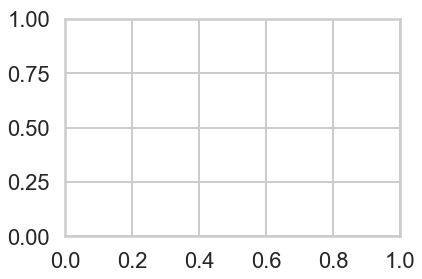

In [15]:
plt.plot(range(1,9),train )
plt.plot(range(1,9),test )

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 9)}
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

In [ ]:
print("best params is : ",grid.best_params_)
print("best score is : ", grid.best_score_)

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics

In [ ]:
y_pred_test = grid.predict(X_test)
y_pred_test_prob = grid.predict_proba(X_test)
print("#####################")
print("Test data")
print("#####################")
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
print(metrics.classification_report(y_test, y_pred_test))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# PR curve
fig2, ax2 = plt.subplots(figsize=(8, 8))
prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
#pr_auc = auc(prec, recall)
plt.plot(recall, prec, lw=1, label='Model Performance (area = %0.2f)' % 
             (metrics.average_precision_score(y_test, y_pred_test_prob[:, 1])))    
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('Recall', size=20)
plt.ylabel('Precision', size=20)
plt.title('PR Curve for', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="top right", fontsize=18)